<a href="https://colab.research.google.com/github/Edwin1719/Machine-Learning-RRHH/blob/main/Machine_Learning_RRHH_VF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DE MACHINE LEARNING RRHH**
**(Analisis Tasa de Abandono del Recurso Humano)**

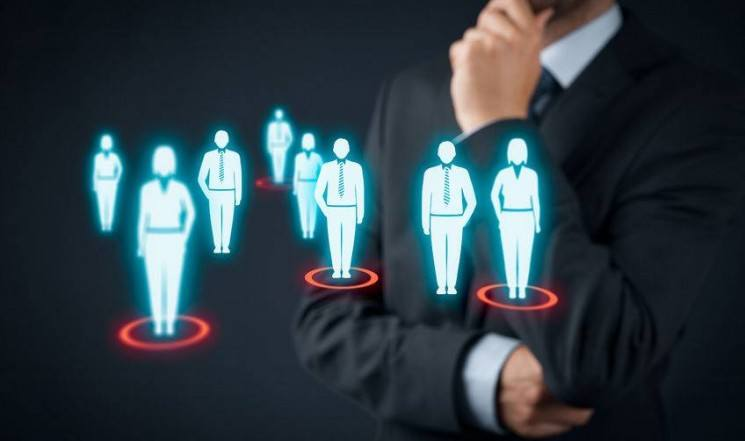



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## PREPARACION DEL ENTORNO DE TRABAJO

### CARGA DE LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### CARGA DE LOS DATOS

A continuacion realizaremos lo siguiente:

* Subir al Colab mediante el Google Drive de la Plataforma

* Ejecucion de la Funcion de lectura en pandas para el CSV AbandonoEmpleados.csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


## ANALISIS EXPLORATORIO DE LOS DATOS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

#### ANÁLISIS DE NULOS

In [ ]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Observaciones:

* anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables
* sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA


In [ ]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


#### EDA VARIABLES CATEGÓRICAS

In [ ]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

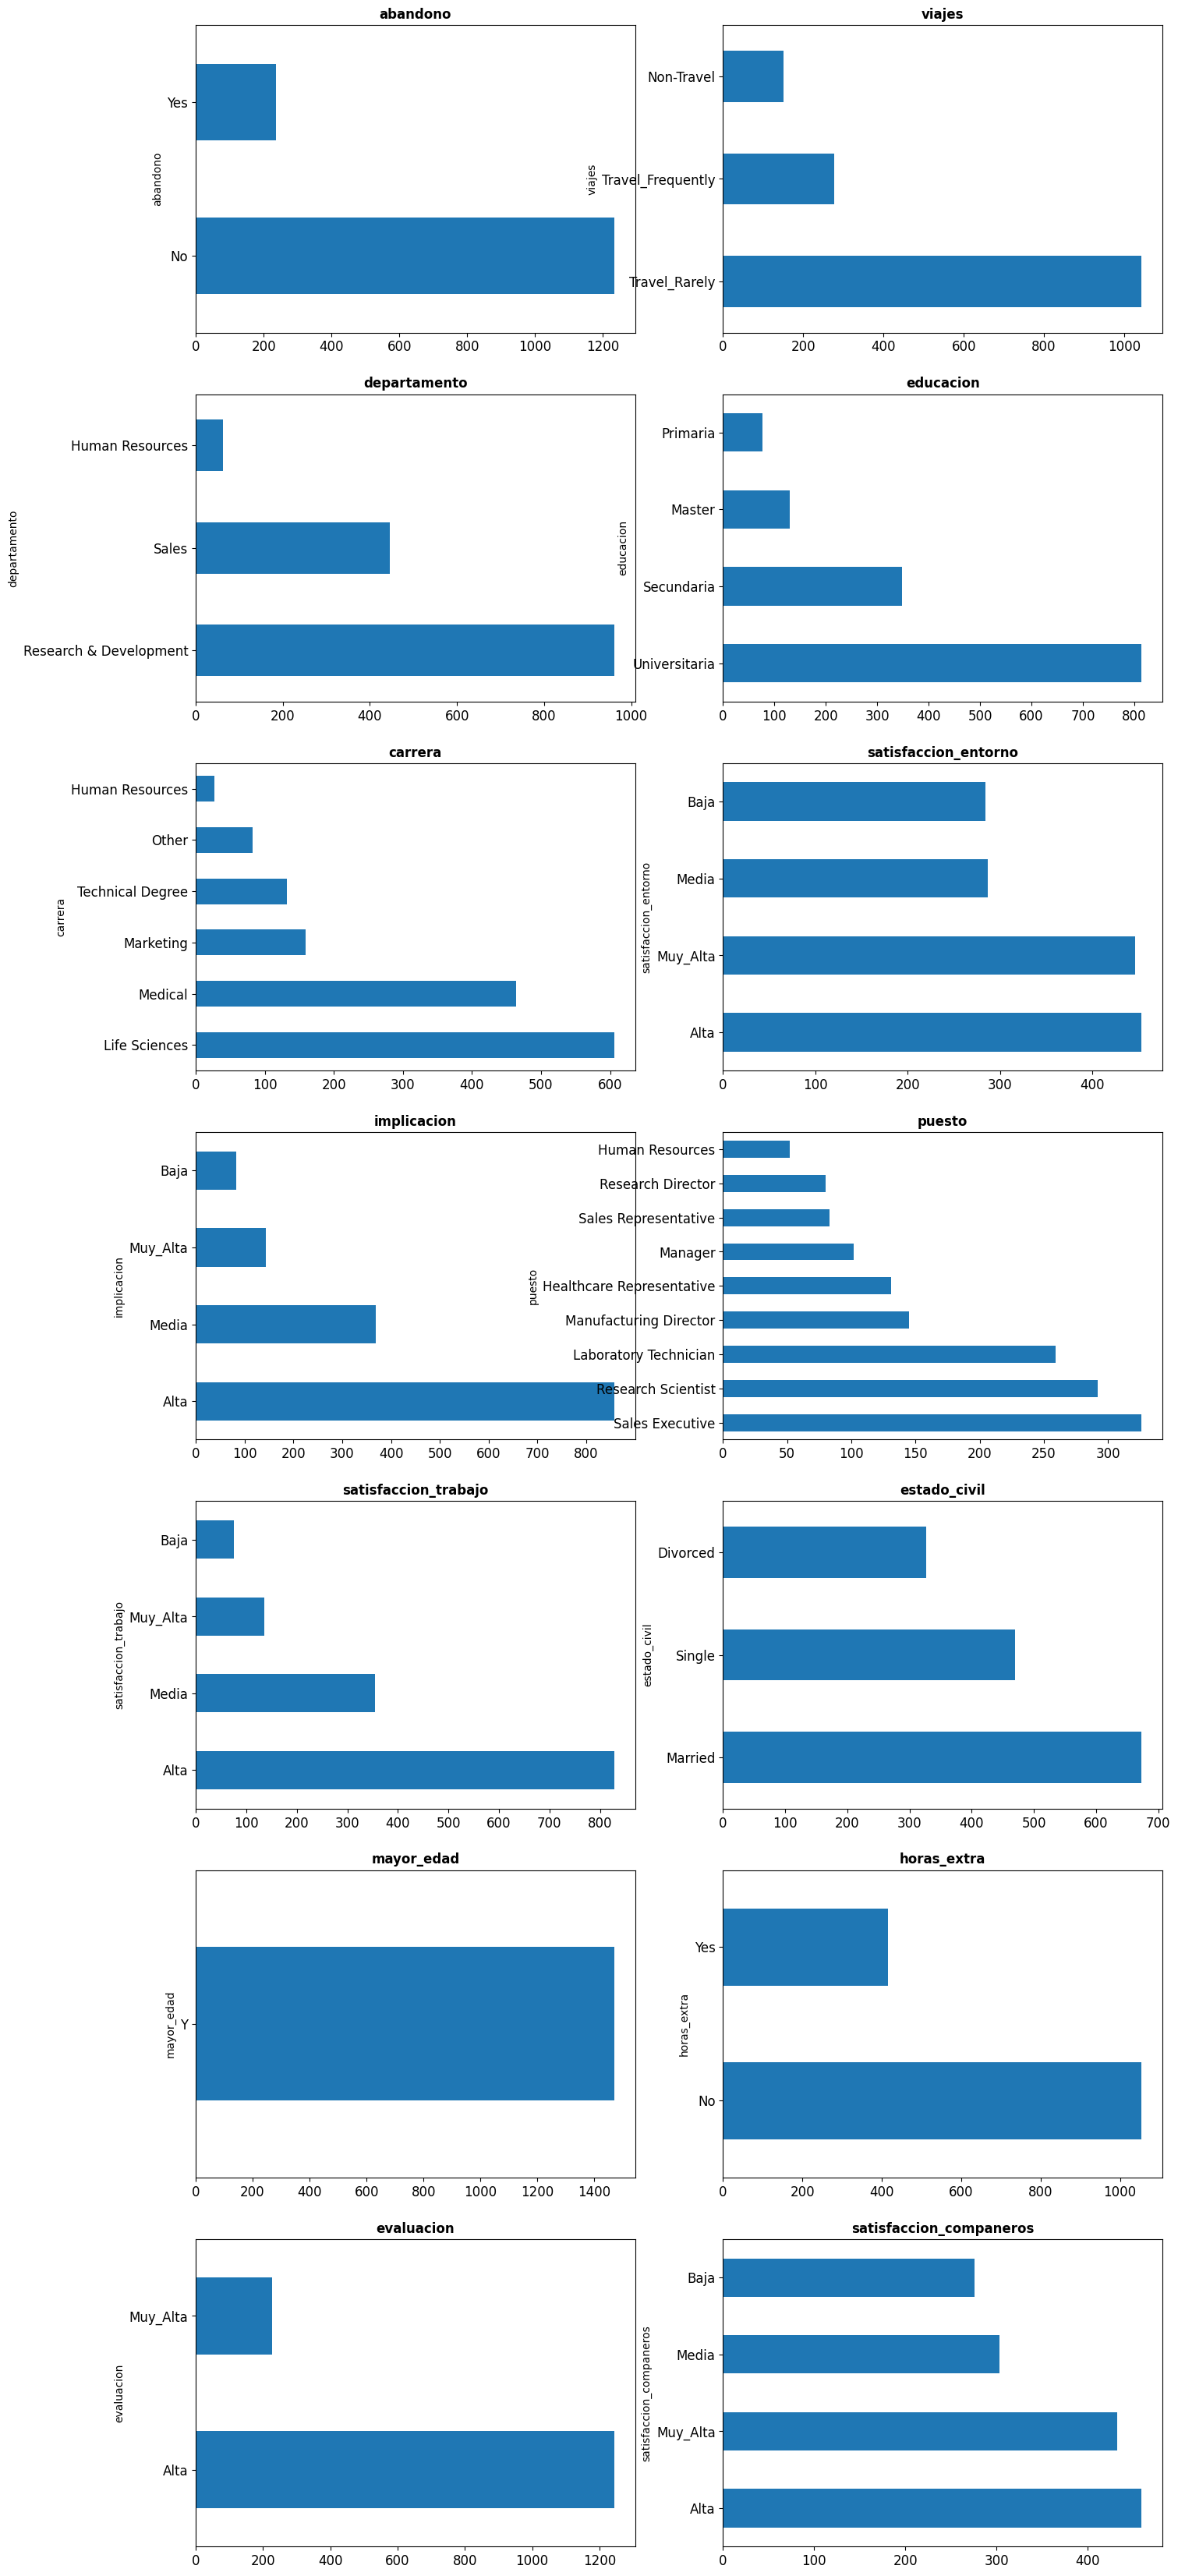

In [ ]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:

* mayor_edad solo tiene un valor --> eliminarla
* Sobre las imputaciones pendientes de variables categóricas:
  * educacion: imputar por 'Universitaria'
  * satisfaccion_trabajo: imputar por 'Alta'
  * implicacion: imputar por 'Alta'

In [ ]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

#### EDA VARIABLES NUMÉRICAS

In [ ]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada


In [ ]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [ ]:
df.abandono.value_counts(normalize = True) * 100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

---
<br/><br/>

### ¿Hay un perfil tipo de empleado que deja la empresa?

In [ ]:
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

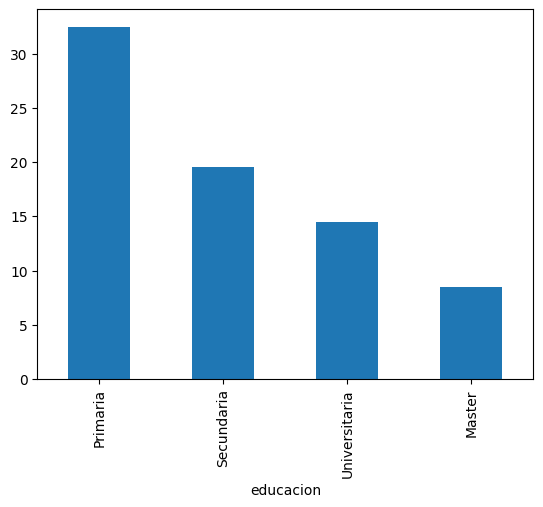

In [ ]:
# Analisis por educación
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

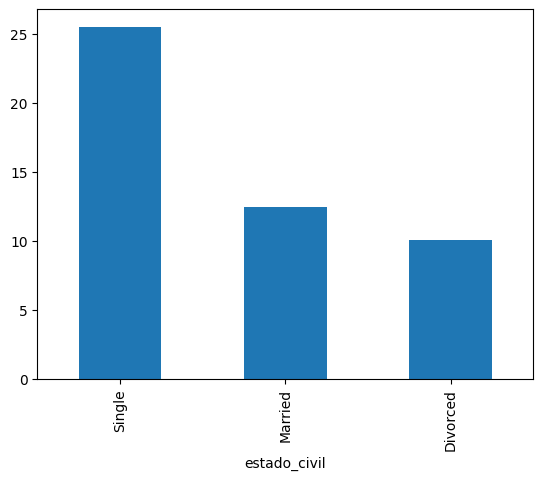

In [ ]:
# Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

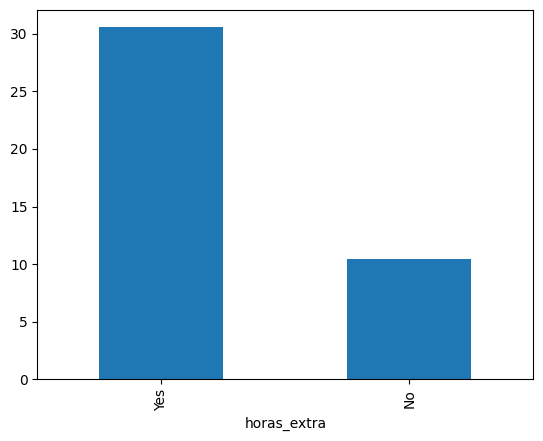

In [ ]:
# Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

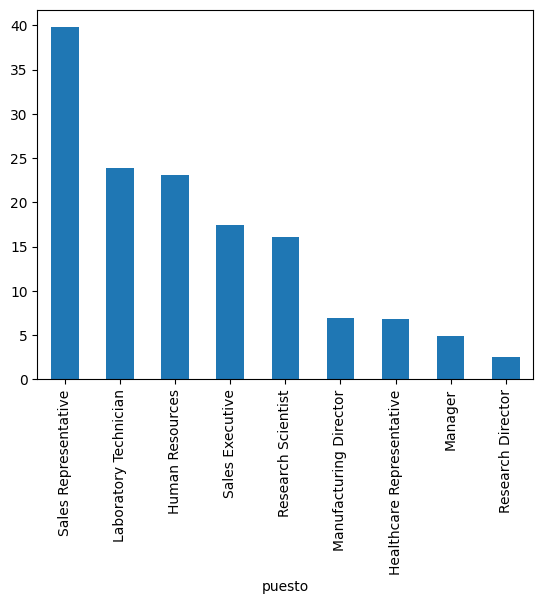

In [ ]:
# Analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

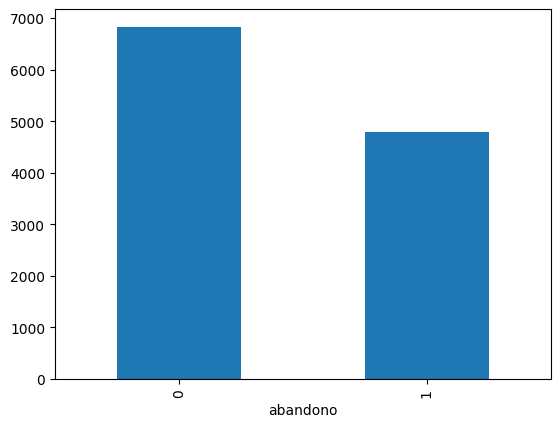

In [ ]:
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

Conclusiones:

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

---
<br/><br/>

### ¿Cual es el impacto económico de este problema?

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [ ]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [ ]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


---
<br/><br/>

### ¿Cúanto nos ha costado este problema en el último año?

In [ ]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

---
<br/><br/>

### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [ ]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

---
<br/><br/>

### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [ ]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


---
<br/><br/>

### Y podemos seguir trazando estrategias asociadas a los insights de abandono:

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [ ]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

Ahora vamos a estimar cuántos se nos irán este año

In [ ]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [ ]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


Este dato también es muy interesante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

## MODELO DE MACHINE LEARNING

In [ ]:
df_ml = df.copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

#### Transformar todas las variables categóricas a númericas

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Preprocesamiento de Datos
def preprocess_data(df):
    # Verificar y manejar valores nulos
    if df.isnull().sum().sum() > 0:
        print("El DataFrame contiene valores nulos. Los valores nulos se llenarán con 'missing' o la mediana según corresponda.")
        cat_cols = df.select_dtypes(include=['object']).columns
        num_cols = df.select_dtypes(include=['number']).columns

        df[cat_cols] = df[cat_cols].fillna('missing')
        df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    # Variables categóricas
    cat = df.select_dtypes(include=['object'])

    # Instanciamos OneHotEncoder
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

    # Entrenamos y aplicamos OneHotEncoder
    cat_ohe = pd.DataFrame(ohe.fit_transform(cat), columns=ohe.get_feature_names_out(input_features=cat.columns)).reset_index(drop=True)

    # Variables numéricas
    num = df.select_dtypes(include=['number']).reset_index(drop=True)

    # Concatenar variables categóricas y numéricas
    df_ml = pd.concat([cat_ohe, num], axis=1)

    return df_ml

#### Dataframe final

In [ ]:
# Preprocesar datos
df_ml = preprocess_data(df)

# Verificar el DataFrame resultante
print(df_ml.info())
df_ml

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 63 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   viajes_Non-Travel                    1470 non-null   float64
 1   viajes_Travel_Frequently             1470 non-null   float64
 2   viajes_Travel_Rarely                 1470 non-null   float64
 3   departamento_Human Resources         1470 non-null   float64
 4   departamento_Research & Development  1470 non-null   float64
 5   departamento_Sales                   1470 non-null   float64
 6   educacion_Master                     1470 non-null   float64
 7   educacion_Primaria                   1470 non-null   float64
 8   educacion_Secundaria                 1470 non-null   float64
 9   educacion_Universitaria              1470 non-null   float64
 10  carrera_Human Resources              1470 non-null   float64
 11  carrera_Life Sciences         

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


### DISEÑO DE LA MODELIZACIÓN

#### Separación variables predictoras y target

In [ ]:
# Separacion e instanciamiento de variables predictoras y target
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

### DEFINICION DE HIPERPARAMETROS Y ENTRENAMIENTO DEL MODELO

In [ ]:
# Definición de los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

# Instanciación del modelo
rf = RandomForestClassifier(random_state=42)

# Implementación de GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Ajuste del modelo
grid_search.fit(train_x, train_y)

# Mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores Hiperparámetros: {best_params}')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores Hiperparámetros: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [ ]:
# Evaluación del modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_
pred_rf = best_rf.predict_proba(test_x)[:, 1]
roc_auc_rf = roc_auc_score(test_y, pred_rf)
print(f'ROC AUC Score - Random Forest: {roc_auc_rf}')

from sklearn.metrics import accuracy_score
pred_labels = best_rf.predict(test_x)

# Metrica de Precision del modelo
accuracy = accuracy_score(test_y, pred_labels)
print(f'Accuracy: {accuracy:.4f}')

ROC AUC Score - Random Forest: 0.7820103537532356
Accuracy: 0.8662


#### Importancia de las variables

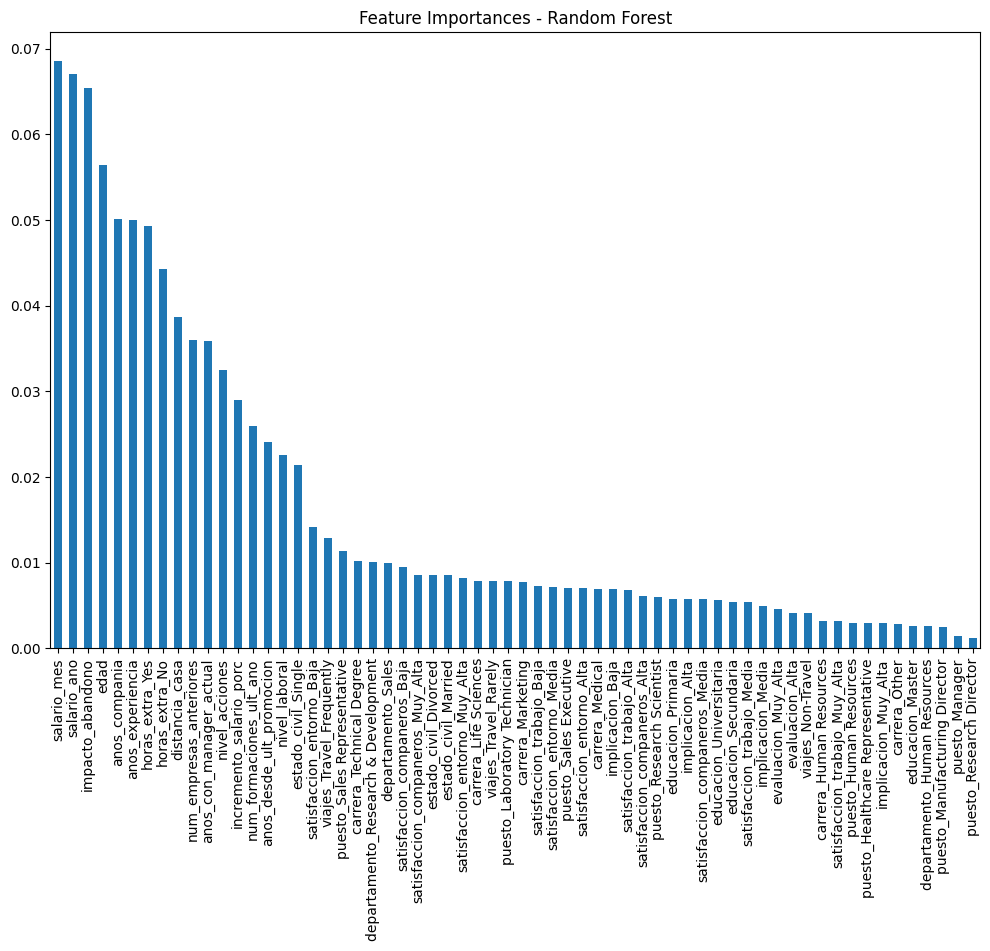

In [ ]:
# Importancia de características - Random Forest optimizado
feature_importances_rf = pd.Series(best_rf.feature_importances_, index=test_x.columns).sort_values(ascending=False)
feature_importances_rf.plot(kind='bar', figsize=(12, 8), title='Feature Importances - Random Forest')
plt.show()

# EXPLOTACIÓN DE RESULTADOS

Incoporación del scoring al dataframe principal

In [ ]:
# Añadir la puntuación de abandono al DataFrame original
df['scoring_abandono'] = best_rf.predict_proba(df_ml.drop(columns='abandono'))[:, 1]

Ejemplo de los 10 empleados con mayor probabilidad de dejar la empresa

In [ ]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10].head(5)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
614,18,1,Travel_Frequently,Sales,5,Universitaria,Marketing,Media,Alta,1,...,Muy_Alta,0,0,3,0,0,0,22536,3628.296,0.912248
1868,29,1,Travel_Frequently,Research & Development,24,Secundaria,Life Sciences,Muy_Alta,Media,1,...,Media,0,1,3,1,1,0,29268,4712.148,0.912075
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,...,Muy_Alta,0,1,4,1,1,0,13416,2159.976,0.883676
1624,18,1,Travel_Frequently,Sales,3,Universitaria,Medical,Media,Alta,1,...,Alta,0,0,2,0,0,0,18828,3031.308,0.882629
622,26,1,Travel_Rarely,Research & Development,24,Primaria,Technical Degree,Alta,Baja,1,...,Media,0,1,3,1,0,0,28080,4520.880,0.879971


Ejemplo: riesgo de dejar la empresa por puesto de trabajo

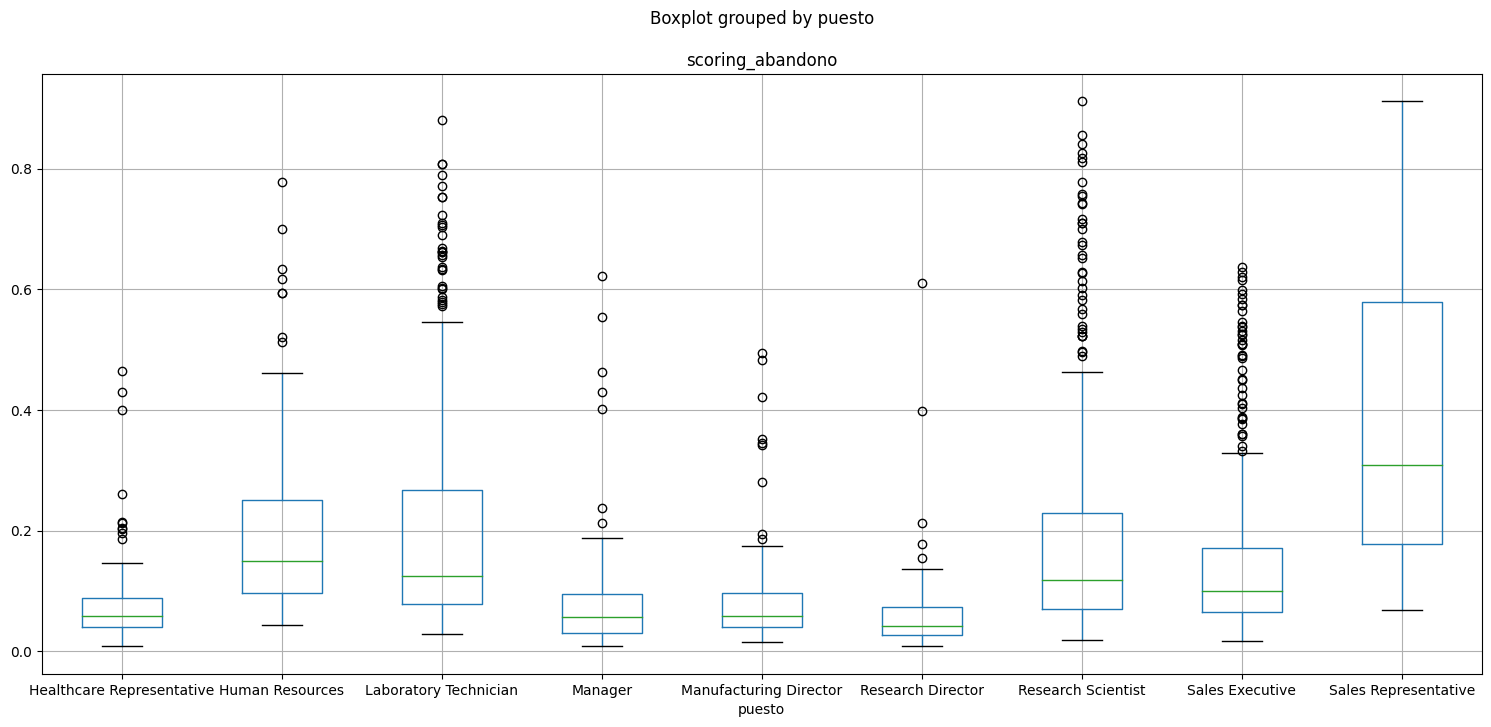

In [ ]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (18,8));

### GUARDAR EL RESULTADO FINAL

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.486401
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.050549
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.752353
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.175107
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.094000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.052998
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.059605
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.075145


In [ ]:
from google.colab import files

df.to_excel('abandono_con_score.xlsx')
files.download('abandono_con_score.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>